# 02 - PCA Analysis
This notebook applies Principal Component Analysis (PCA) to the cleaned data to reduce dimensionality while retaining variance.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load cleaned data
DATA_PATH = '../data/heart_disease.csv'
df = pd.read_csv(DATA_PATH)
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (303, 26)


,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp_1.0,cp_2.0,...,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,target
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0.686202,2.394438,-0.696631,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,0.686202,-0.417635,1.435481,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,0.686202,-0.417635,1.435481,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0.686202,-0.417635,-0.696631,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,-1.457296,-0.417635,-0.696631,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [7]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print('Number of components:', len(pca.explained_variance_ratio_))
print('Explained variance ratio:', pca.explained_variance_ratio_)

Number of components: 25
Explained variance ratio: [1.80707993e-01 8.56195488e-02 7.06789031e-02 6.82167740e-02
 6.28668570e-02 5.89974348e-02 5.25866441e-02 5.03545598e-02
 4.58546844e-02 4.46013619e-02 3.94087084e-02 3.83920174e-02
 3.59994286e-02 3.18984208e-02 3.04981495e-02 2.68691687e-02
 2.48147170e-02 2.08823123e-02 1.61734367e-02 1.45788791e-02
 2.51421051e-17 7.55131205e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


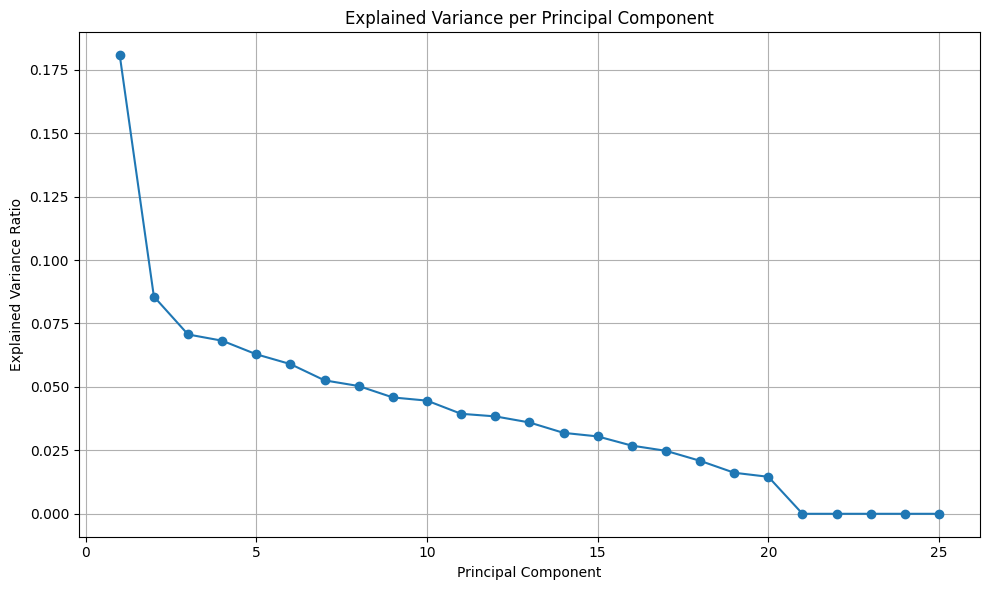

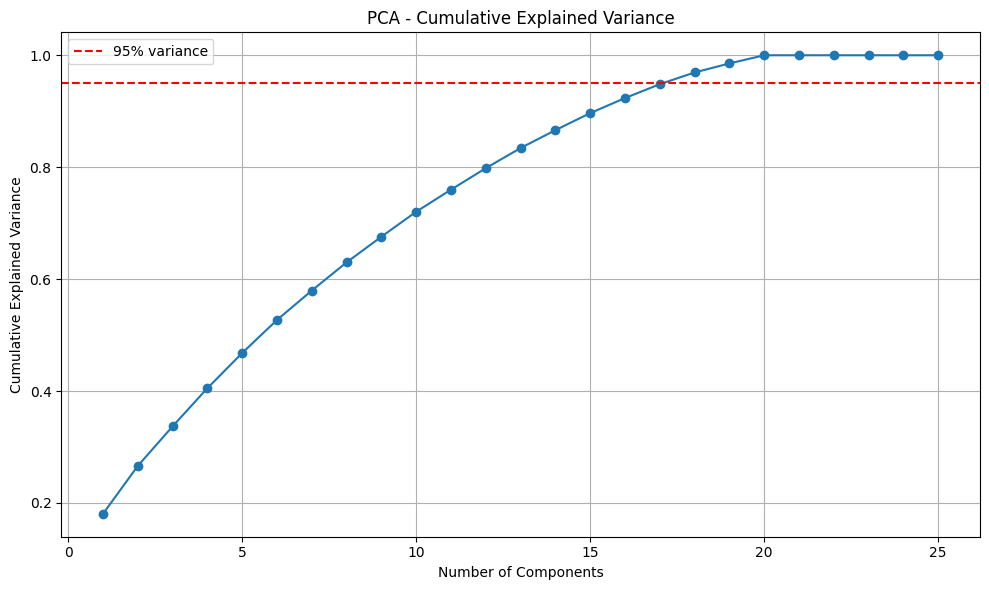

In [8]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Principal Component')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cumulative explained variance plot
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.legend()
plt.tight_layout()
plt.show()

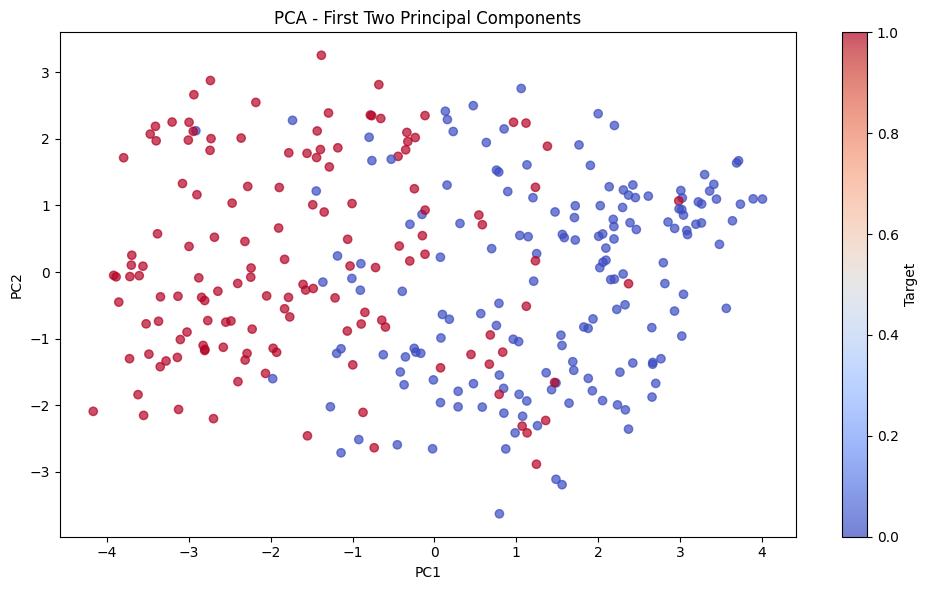

In [9]:
# Scatter plot of first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='Target')
plt.tight_layout()
plt.show()

In [10]:
# Determine optimal number of components
n_components = len([i for i in cum_var if i < 0.95]) + 1
print(f'Optimal number of components to retain 95% variance: {n_components}')

# Prepare PCA-transformed data in memory
pca_df = pd.DataFrame(X_pca[:, :n_components], columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['target'] = y
print('PCA results prepared in memory.')

# Append PCA summary to evaluation_metrics.txt
metrics_path = '../results/evaluation_metrics.txt'
os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
with open(metrics_path, 'a', encoding='utf-8') as f:
    f.write('=== PCA Summary ===\n')
    f.write(f'Optimal components (95% variance): {n_components}\n')
    f.write('Explained variance ratio (first 10):\n')
    f.write(np.array2string(pca.explained_variance_ratio_[:10], precision=4, separator=', '))
    f.write('\n\n')
print(f'PCA summary appended to {metrics_path}')

Optimal number of components to retain 95% variance: 18
PCA results prepared in memory.
PCA summary appended to ../results/evaluation_metrics.txt
